Both geocentric coordinate system and geodetic coordinate system are geographic coordinate systems centred at the mass of the earth. In geocentric coordinate system, the earth is modelled as a sphere. The geodetic coordinate system is based on the reference ellipsoid considering the centrifugal force due to the earth's rotation.

The major difference between these two systems is the way how they define latitude and height. In geocentric coordinate system, the geocentric latitude is defined by the angle between the plane the equator and the line from earth centre to a given point. The distance from the point to the earth centre is geocentric radius R. In geodetic coordinate system, the geodetic latitude is the angle between the plane of the equator and the surface normal at a point on the ellipsoid. The elliposid height h is the height abrove the elliposid surface, it also normal to that surface.



![title](Coordinate.png)

Note, the flattening of the shown ellipsoid is larger than the real earth. The real difference between geodetic latitude and geocentric latitude at the earth ellipsoid surface is less than 0.2 degrees.

This example will show you how to convert geodetic latitude and height into geocentric latitude and radius. We use WGS84 ellipsoid in here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import boule as bl


latitude = np.linspace(-90, 90, 100)
longitude = 0
# ellipsoid surface
Height1=0
# ICESat-2 orbit height
Height2=481000
SP_Cor1 = bl.WGS84.geodetic_to_spherical(longitude , latitude, Height1)
SP_Cor2 = bl.WGS84.geodetic_to_spherical(longitude , latitude, Height2)

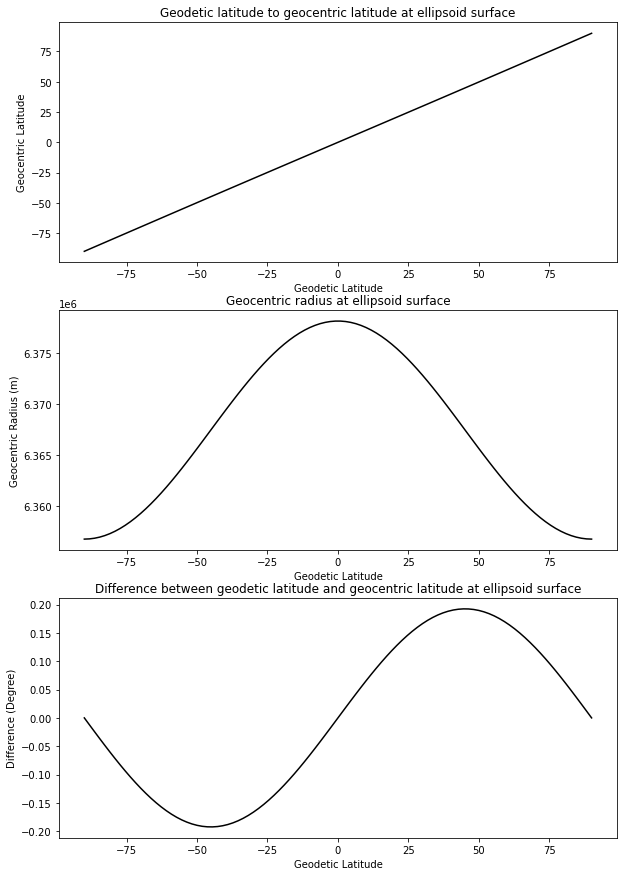

In [2]:
fig, (axs1,axs2,axs3) = plt.subplots(3,1,figsize=(10,15))

axs1.plot(latitude, SP_Cor1[1], "-k")
axs1.set_title("Geodetic latitude to geocentric latitude at ellipsoid surface")
axs1.set(xlabel="Geodetic Latitude", ylabel="Geocentric Latitude")

axs2.plot(latitude, SP_Cor1[2], "-k")
axs2.set_title("Geocentric radius at ellipsoid surface")
axs2.set(xlabel="Geodetic Latitude", ylabel="Geocentric Radius (m)")

axs3.plot(latitude, latitude-SP_Cor1[1], "-k")
axs3.set_title("Difference between geodetic latitude and geocentric latitude at ellipsoid surface")
axs3.set(xlabel="Geodetic Latitude", ylabel="Difference (Degree)")

plt.show()

The geocentric latitude is a function of geodetic latitude and ellipsoid height. The influence of ellipsoid height change on the geocentric latitude varies with the geodetic latitude. Consider different ellipsoid heights (ICESat-2 orbit height vs ellipsoid surface), this difference could be 0.013 degrees. Similarly, the Geocentric radius change could be 2.5 meters.

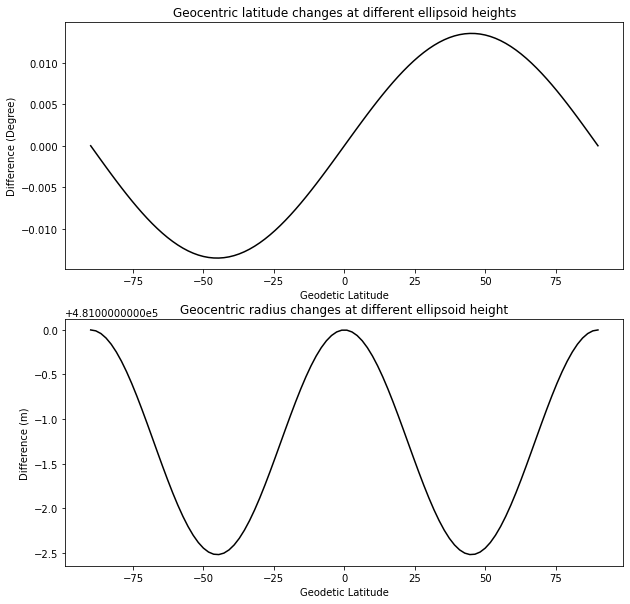

In [3]:
fig, (axs1,axs2) = plt.subplots(2,1,figsize=(10,10))

axs1.plot(latitude, SP_Cor2[1]-SP_Cor1[1], "-k")
axs1.set_title("Geocentric latitude changes at different ellipsoid heights")
axs1.set(xlabel="Geodetic Latitude", ylabel="Difference (Degree)")


axs2.plot(latitude, SP_Cor2[2]-SP_Cor1[2], "-k")
axs2.set_title("Geocentric radius changes at different ellipsoid height")
axs2.set(xlabel="Geodetic Latitude", ylabel="Difference (m)")

plt.show()